In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing

from gc import collect as collect_garbage
from psutil import virtual_memory
from os import scandir

In [4]:
%matplotlib widget

In [5]:
virtual_memory()

svmem(total=12655771648, available=7351578624, percent=41.9, used=5304193024, free=7351578624)

In [6]:
folder = "../../Deidentified-Raw-Waveforms/"
coldict = {
    "raw_waves_data_1a.csv": ["time", "257"], "raw_waves_data_1b.csv": ["time", "257", "258"], "raw_waves_data_1c.csv": ["time", "257", "258"], "raw_waves_data_1d.csv": ["time", "257", "258", "317"], 
    "raw_waves_data_1e.csv": ["time", "258"],

    "raw_waves_data_2a.csv": ["time", "257", "258"], "raw_waves_data_2b.csv": ["time", "258"], "raw_waves_data_2c.csv": ["time", "257"], "raw_waves_data_2d.csv": ["time", "257", "258"], 
    "raw_waves_data_2e.csv": ["time", "257", "258"],

    "raw_waves_data_3a.csv": ["time", "258"], "raw_waves_data_3b.csv": ["time", "258"], "raw_waves_data_3c.csv": ["time", "258"], "raw_waves_data_3d.csv": ["time", "258"], 
    "raw_waves_data_3e.csv": ["time", "257", "258", "317"],

    "raw_waves_data_4a.csv": ["time", "257", "258"], "raw_waves_data_4b.csv": ["time", "257", "258"], "raw_waves_data_4c.csv": ["time", "257"], "raw_waves_data_4d.csv": ["time", "257", "258"], 
    "raw_waves_data_4e.csv": ["time", "257", "258"],

    "raw_waves_data_5a.csv": ["time", "258"], "raw_waves_data_5b.csv": ["time", "258"], "raw_waves_data_5c.csv": ["time", "258"], "raw_waves_data_5d.csv": ["time", "258", "317"],
    "raw_waves_data_5e.csv": ["time", "258"],

    "raw_waves_data_6a.csv": ["time", "257", "258"], "raw_waves_data_6b.csv": ["time", "258"], "raw_waves_data_6c.csv": ["time", "258"], "raw_waves_data_6d.csv": ["time", "258"], "raw_waves_data_6e.csv": ["time", "258"],
    
    "raw_waves_data_7a.csv": ["time", "257", "258"], "raw_waves_data_7b.csv": ["time", "258"], "raw_waves_data_7c.csv": ["time", "258"], "raw_waves_data_7d.csv": ["time", "257", "258", "317"], 
    "raw_waves_data_7e.csv": ["time", "258"]
}

namedict = {
    "raw_waves_data_1a.csv": "1a", "raw_waves_data_1b.csv": "1b", "raw_waves_data_1c.csv": "1c", "raw_waves_data_1d.csv": "1d", "raw_waves_data_1e.csv": "1e",
    "raw_waves_data_2a.csv": "2a", "raw_waves_data_2b.csv": "2b", "raw_waves_data_2c.csv": "2c", "raw_waves_data_2d.csv": "2d", "raw_waves_data_2e.csv": "2e",
    "raw_waves_data_3a.csv": "3a", "raw_waves_data_3b.csv": "3b", "raw_waves_data_3c.csv": "3c", "raw_waves_data_3d.csv": "3d", "raw_waves_data_3e.csv": "3e",
    "raw_waves_data_4a.csv": "4a", "raw_waves_data_4b.csv": "4b", "raw_waves_data_4c.csv": "4c", "raw_waves_data_4d.csv": "4d", "raw_waves_data_4e.csv": "4e",
    "raw_waves_data_5a.csv": "5a", "raw_waves_data_5b.csv": "5b", "raw_waves_data_5c.csv": "5c", "raw_waves_data_5d.csv": "5d", "raw_waves_data_5e.csv": "5e",
    "raw_waves_data_6a.csv": "6a", "raw_waves_data_6b.csv": "6b", "raw_waves_data_6c.csv": "6c", "raw_waves_data_6d.csv": "6d", "raw_waves_data_6e.csv": "6e",
    "raw_waves_data_7a.csv": "7a", "raw_waves_data_7b.csv": "7b", "raw_waves_data_7c.csv": "7c", "raw_waves_data_7d.csv": "7d", "raw_waves_data_7e.csv": "7e"    
}

In [2]:
# File 3e would be a good one to examine sampling frequencies
file = "raw_waves_data_3e.csv"

In [6]:
df = pd.read_csv(folder + file, usecols=coldict[file])

In [7]:
collect_garbage()
print(virtual_memory())

svmem(total=12655771648, available=7348314112, percent=41.9, used=5307457536, free=7348314112)


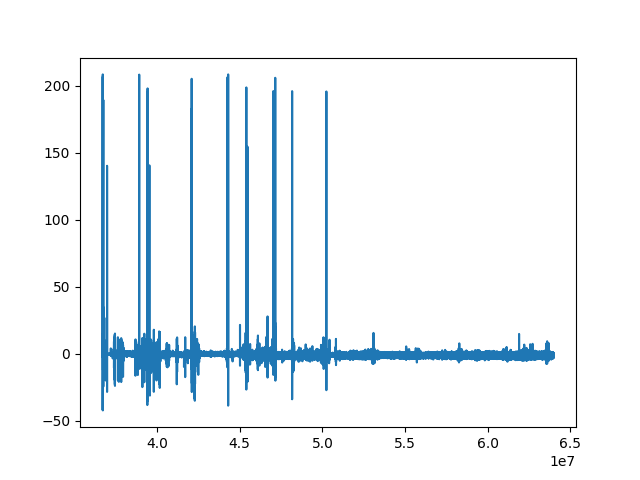

In [8]:
plt.figure()
plt.plot(df["257"])
#plt.plot(df["258"])
#plt.plot(df["317"])
plt.show()

In [8]:
virtual_memory()

svmem(total=12655771648, available=5934522368, percent=53.1, used=6721249280, free=5934522368)

In [11]:
sum(df["258"].isna())

24128

In [10]:
df.loc[ df["257"].isna(),  ]

,time,258,317,257
0,5.788800e+06,0.2285,NaN,NaN
1,5.788800e+06,0.2234,NaN,NaN
2,5.788800e+06,-0.0571,NaN,NaN
3,5.788800e+06,-0.4549,NaN,NaN
4,5.788800e+06,-0.7099,NaN,NaN
...,...,...,...,...
63978453,6.048000e+06,-0.4804,NaN,-0.2968
63978454,6.048000e+06,-0.4447,NaN,-0.3274
63978455,6.048000e+06,-0.4447,NaN,-0.3376
63978456,6.048000e+06,-0.4855,NaN,-0.3274


In [12]:
summand = 0
for i in range(50):
    summand += 1/(df.loc[i+1, "time"] - df.loc[i, "time"])
print(summand/50)

245.7002066757477


In [19]:
# Okay, I just need to see if the sampling frequencies time steps are all around 
max((1/(df["time"].diff().fillna(np.infty))))

258.0793138150578

In [20]:
# Okay, so I can calculate this on each dataframe's time column, and then 

In [8]:
files = sorted([file.name for file in scandir(folder)])

In [9]:
files

['raw_waves_data_1a.csv',
 'raw_waves_data_1b.csv',
 'raw_waves_data_1c.csv',
 'raw_waves_data_1d.csv',
 'raw_waves_data_1e.csv',
 'raw_waves_data_2a.csv',
 'raw_waves_data_2b.csv',
 'raw_waves_data_2c.csv',
 'raw_waves_data_2d.csv',
 'raw_waves_data_2e.csv',
 'raw_waves_data_3a.csv',
 'raw_waves_data_3b.csv',
 'raw_waves_data_3c.csv',
 'raw_waves_data_3d.csv',
 'raw_waves_data_3e.csv',
 'raw_waves_data_4a.csv',
 'raw_waves_data_4b.csv',
 'raw_waves_data_4c.csv',
 'raw_waves_data_4d.csv',
 'raw_waves_data_4e.csv',
 'raw_waves_data_5a.csv',
 'raw_waves_data_5b.csv',
 'raw_waves_data_5c.csv',
 'raw_waves_data_5d.csv',
 'raw_waves_data_5e.csv',
 'raw_waves_data_6a.csv',
 'raw_waves_data_6b.csv',
 'raw_waves_data_6c.csv',
 'raw_waves_data_6d.csv',
 'raw_waves_data_6e.csv',
 'raw_waves_data_7a.csv',
 'raw_waves_data_7b.csv',
 'raw_waves_data_7c.csv',
 'raw_waves_data_7d.csv',
 'raw_waves_data_7e.csv']

In [10]:
virtual_memory()

svmem(total=12655771648, available=5938282496, percent=53.1, used=6717489152, free=5938282496)

In [10]:
for file in files:
    df = pd.read_csv(folder + file, usecols=["time"])
    freqs = 1/(df["time"].diff().fillna(np.infty))
    freqs = freqs[freqs <= 1000]
    plt.figure()
    plt.hist(freqs)
    plt.title("Frequency Distribution " + namedict[file])
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Count")
    plt.savefig("frequency_distributions_" + namedict[file] + ".jpg", dpi=300, bbox_inches="tight")
    plt.close()
    del df
    collect_garbage()
    print(namedict[file] + " frequencies processed")


1a frequencies processed
1b frequencies processed
1c frequencies processed
1d frequencies processed
1e frequencies processed
2a frequencies processed
2b frequencies processed
2c frequencies processed
2d frequencies processed
2e frequencies processed
3a frequencies processed
3b frequencies processed
3c frequencies processed
3d frequencies processed
3e frequencies processed
4a frequencies processed
4b frequencies processed
4c frequencies processed
4d frequencies processed
4e frequencies processed
5a frequencies processed
5b frequencies processed
5c frequencies processed
5d frequencies processed
5e frequencies processed
6a frequencies processed
6b frequencies processed
6c frequencies processed
6d frequencies processed
6e frequencies processed
7a frequencies processed
7b frequencies processed
7c frequencies processed
7d frequencies processed
7e frequencies processed


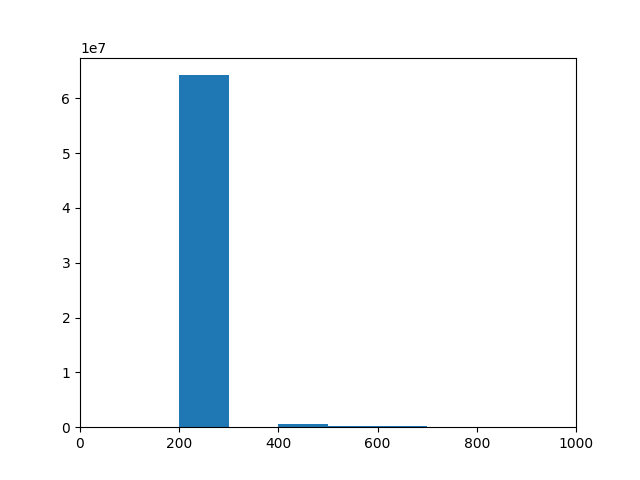

In [12]:
freqs2 = freqs[ freqs < 1000 ]
plt.figure()
plt.hist(freqs2)
plt.xlim(0,1000)
plt.show()